<a href="https://colab.research.google.com/github/KarthikChary1/EDA/blob/main/eda-Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [50]:
df=pd.read_csv("cleared_data.csv")

In [3]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wb,length,width,height,curb-weight,engine-type,noc,es,fs,bore,stroke,cr,hp,pr,cm,hm,price
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
df.drop(["Unnamed: 0"],inplace=True,axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wb                 205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  noc                205 non-null    object 
 16  es                 205 non

In [6]:
df.describe()

,symboling,normalized-losses,wb,length,width,height,curb-weight,es,bore,stroke,cr,hp,pr,cm,hm,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wb                    0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
noc                   0
es                    0
fs                    0
bore                  4
stroke                4
cr                    0
hp                    2
pr                    2
cm                    0
hm                    0
price                 4
dtype: int64

In [8]:
categorical=[x for x in df.columns if df[x].dtype=="O"]

In [9]:
categorical 

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'noc',
 'fs']

In [10]:
numerical=[x for x in df.columns if x not in categorical]

In [11]:
numerical

['symboling',
 'normalized-losses',
 'wb',
 'length',
 'width',
 'height',
 'curb-weight',
 'es',
 'bore',
 'stroke',
 'cr',
 'hp',
 'pr',
 'cm',
 'hm',
 'price']

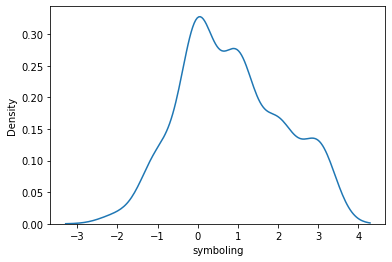

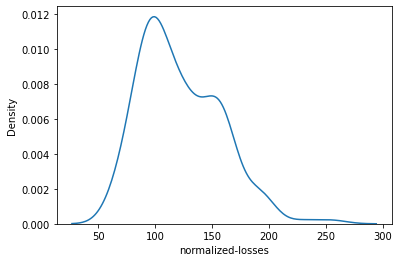

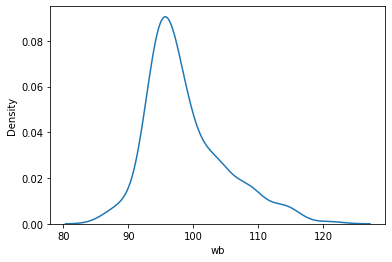

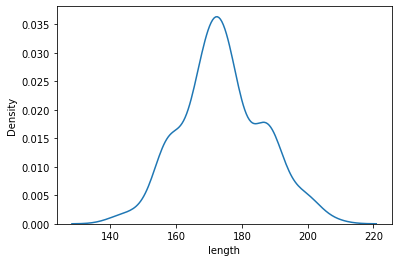

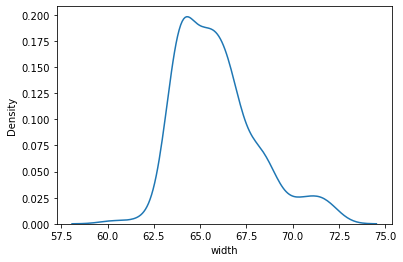

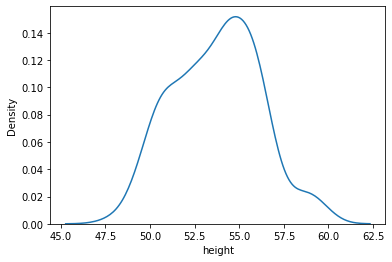

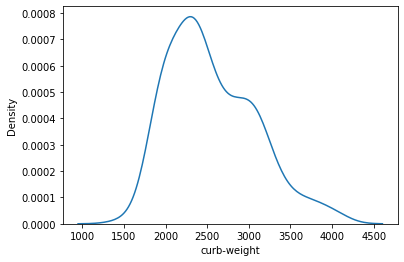

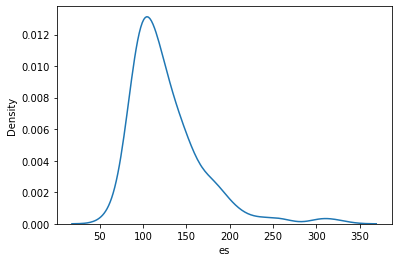

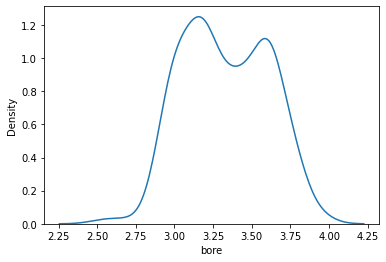

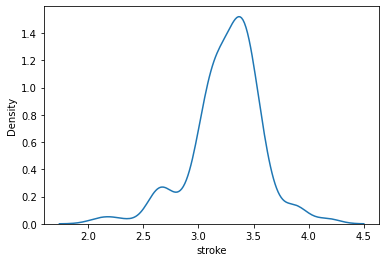

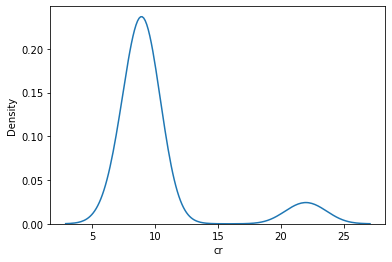

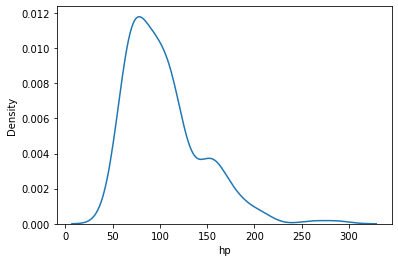

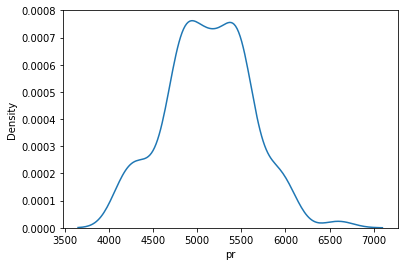

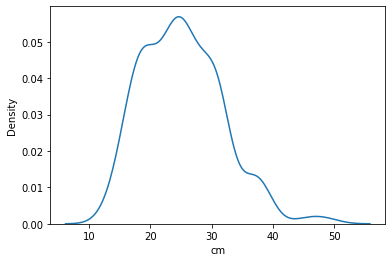

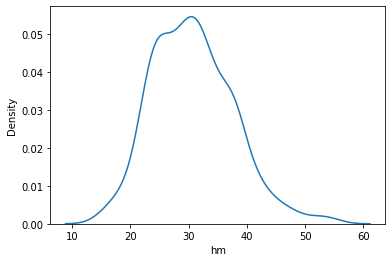

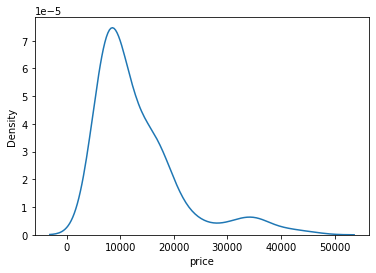

In [12]:
for i in numerical:
  sns.kdeplot(df[i],)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


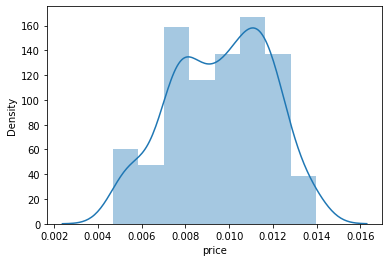

In [13]:
sns.distplot(1/(df.price)**0.5)

In [17]:
for i in numerical:
  print("skewness of {}:{}".format(i,df[i].skew()))

skewness of symboling:0.21107227205788776
skewness of normalized-losses:0.7659764175950632
skewness of wb:1.0502137758714858
skewness of length:0.1559537713215604
skewness of width:0.904003498786254
skewness of height:0.06312273247192804
skewness of curb-weight:0.681398189052588
skewness of es:1.9476550452788108
skewness of bore:0.020015510309870796
skewness of stroke:-0.6831221940577341
skewness of cr:2.6108624576151533
skewness of hp:1.3910294937929355
skewness of pr:0.07323669149378209
skewness of cm:0.6637040288148164
skewness of hm:0.5399971878746754
skewness of price:1.8096753390980749


In [25]:
array=[]
for i in numerical:
  array.append(df[i].skew())

In [36]:
skewness=pd.DataFrame()
skewness["name"]=numerical
skewness["values"]=array

In [40]:
skewness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    16 non-null     object 
 1   values  16 non-null     float64
dtypes: float64(1), object(1)
memory usage: 384.0+ bytes


In [47]:
nosk=skewness[(skewness["values"]>-0.5) & (skewness["values"]<0.5)]["name"]

In [48]:
for i in numerical:
  if i not in nosk:
    df[i]=np.log(df[i])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


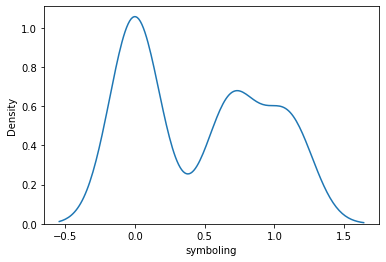

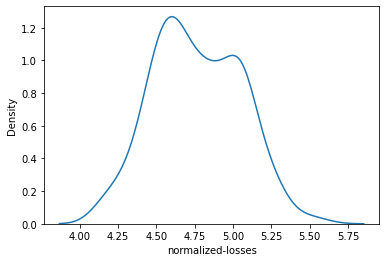

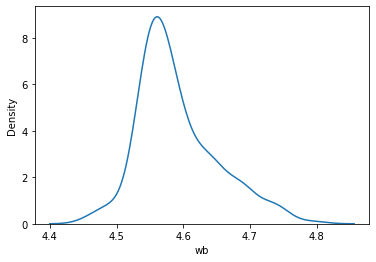

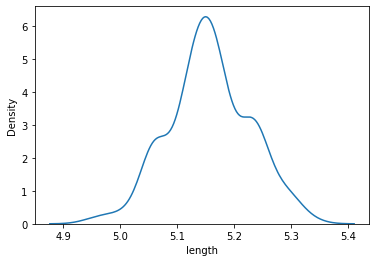

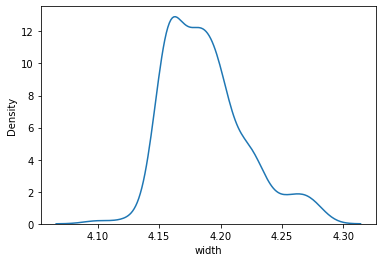

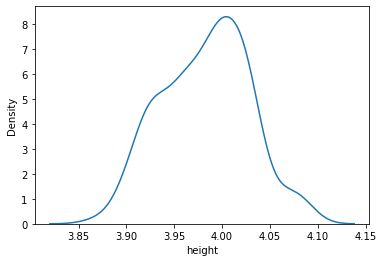

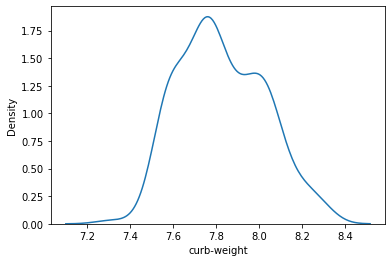

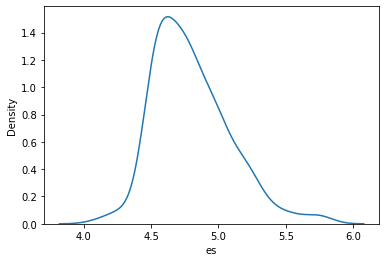

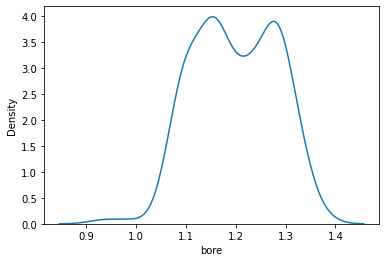

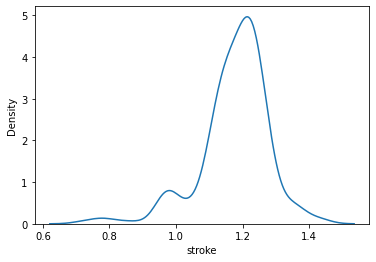

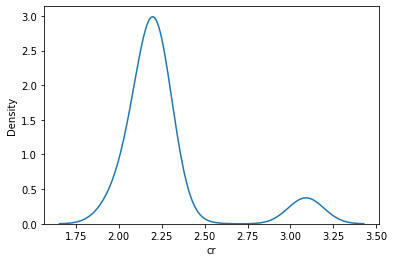

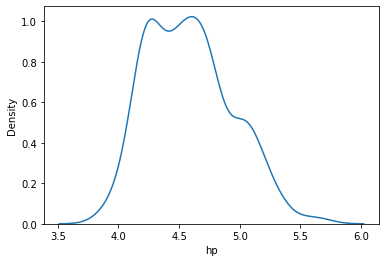

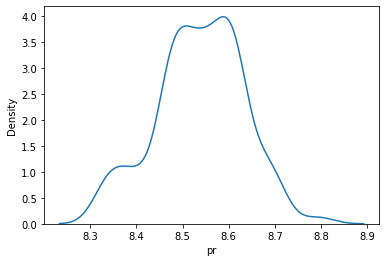

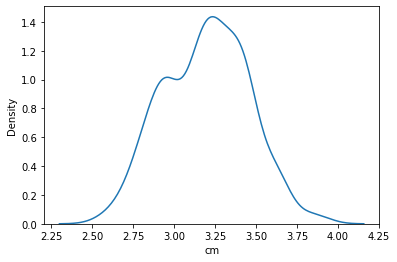

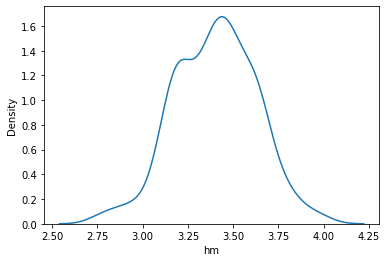

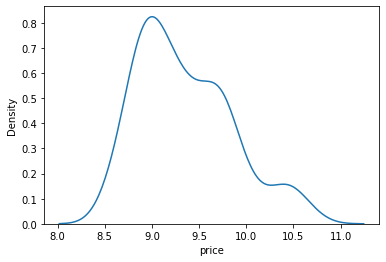

In [49]:
for i in numerical:
  sns.kdeplot(df[i],)
  plt.show()

In [51]:
df["symboling"]=df5.symboling

In [52]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wb,length,width,height,curb-weight,engine-type,noc,es,fs,bore,stroke,cr,hp,pr,cm,hm,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,4.484132,5.128715,4.160444,3.887730,7.843064,dohc,four,4.867534,mpfi,1.244155,0.985817,2.197225,4.709530,8.517193,3.044522,3.295837,9.510075
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,4.484132,5.128715,4.160444,3.887730,7.843064,dohc,four,4.867534,mpfi,1.244155,0.985817,2.197225,4.709530,8.517193,3.044522,3.295837,9.711116
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,4.548600,5.142832,4.182050,3.958907,7.945555,ohcv,six,5.023881,mpfi,0.985817,1.244155,2.197225,5.036953,8.517193,2.944439,3.258097,9.711116
3,2,5.099866,audi,gas,std,four,sedan,fwd,front,4.603168,5.173887,4.192680,3.994524,7.756623,ohc,four,4.691348,mpfi,1.160021,1.223775,2.302585,4.624973,8.612503,3.178054,3.401197,9.543235
4,2,5.099866,audi,gas,std,four,sedan,4wd,front,4.599152,5.173887,4.195697,3.994524,7.945910,ohc,five,4.912655,mpfi,1.160021,1.223775,2.079442,4.744932,8.612503,2.890372,3.091042,9.767095


In [56]:
for i in numerical:
  df[i].fillna(np.mean(df[i]),inplace=True)

In [57]:
df[numerical].isna().sum()

symboling            0
normalized-losses    0
wb                   0
length               0
width                0
height               0
curb-weight          0
es                   0
bore                 0
stroke               0
cr                   0
hp                   0
pr                   0
cm                   0
hm                   0
price                0
dtype: int64

In [58]:
df[categorical].isna().sum()

make               0
fuel-type          0
aspiration         0
num-of-doors       2
body-style         0
drive-wheels       0
engine-location    0
engine-type        0
noc                0
fs                 0
dtype: int64

In [63]:
import statistics
df["num-of-doors"].fillna("four",inplace=True)